In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
layoffs_data = "../Output/fileTwo.csv"

In [4]:
layoff_df = pd.read_csv(layoffs_data)
layoff_df.head()

,years,months,"Unemployment level, 16yo and over, thousands","Job losers, 16yo and over, thousands","Job losers on layoff, 16yo and over, thousands","Job losers not on layoff, 16yo and over, thousands","Job leavers (quit), 16yo and over, thousands","Reentrants to labor force, 16yo and over, thousands","New entrants to labor force, 16yo and over, thousands"
0,2018,December,6286,2892,768,2123,827,1968,600
1,2018,November,6034,2849,835,2014,709,1897,585
2,2018,October,6123,2876,825,2050,732,1925,597
3,2018,September,6045,2864,857,2007,742,1907,582
4,2018,August,6167,2843,844,1999,875,1856,591


In [5]:
# pie chart the job loosers layoff vs not on layoff - DONE
# unemployment rise = rise in reentrants and new entrants to labor force - DONE
# check to see if there is any fluxuation in quitting

In [14]:
years = layoff_df['years'].unique()
monthnumber = [ ]

for year in years:
    month = 13
    while (month > 1): 
        month = month -1
        monthnumber.append(month)
        if  month == 0:
            break
layoff_df['Month #'] = monthnumber

In [13]:
dates = []

for index, row in layoff_df.iterrows():
    datenumber = str(f"{row['years']}-{row['Month #']}")
    dates.append(datenumber)

layoff_df['Date'] = dates

In [23]:
layoff_df = layoff_df.rename(columns={'years': 'Year', 'months': 'Month', 'Unemployment level, 16yo and over, thousands': 'Overall Unemployment',
                                     'Job losers, 16yo and over, thousands': 'Loss of Job Total', 'Job losers on layoff, 16yo and over, thousands': 'Loss of Job: On Layoff',
                                     'Job losers not on layoff, 16yo and over, thousands': 'Loss of Job: Not on Layoff', "Job leavers (quit), 16yo and over, thousands": "Number of Persons Quitting",
                                     'Reentrants to labor force, 16yo and over, thousands': 'Reentrants to Labor Force', 'New entrants to labor force, 16yo and over, thousands': 'New Entrants to Labor Force'})

In [60]:
layoff_df = layoff_df[['Year', 'Month', 'Month #', 'Date', 'Overall Unemployment', 'Loss of Job Total', 'Loss of Job: on Layoff', 'Loss of Job: Not on Layoff', 
                      'Number of Persons Quitting', 'Reentrants to Labor Force', 'New Entrants to Labor Force']]

recession_layoffs = layoff_df[layoff_df['Year']<=2011]
recession_layoffs.head()

,Year,Month,Month #,Date,Overall Unemployment,Loss of Job Total,Loss of Job: on Layoff,Loss of Job: Not on Layoff,Number of Persons Quitting,Reentrants to Labor Force,New Entrants to Labor Force
84,2011,December,12,2011-12,13093,7555,1238,6317,952,3359,1282
85,2011,November,11,2011-11,13302,7651,1180,6471,1011,3357,1277
86,2011,October,10,2011-10,13594,7891,1247,6644,1086,3370,1287
87,2011,September,9,2011-9,13948,8027,1203,6824,973,3470,1378
88,2011,August,8,2011-8,13818,8009,1181,6829,979,3520,1254


In [40]:
onlayoff = recession_layoffs['Loss of Job: on Layoff'].sum()
offlayoff = recession_layoffs['Loss of Job: Not on Layoff'].sum()

labels = ['On Layoff', 'Not on Layoff'] 
layoffsplit = [onlayoff, offlayoff]
colors = ['orange', 'lightskyblue']

Text(0.5, 1.0, 'Job Loss % On Layoff vs. Not on Layoff (2008 - 2011)')

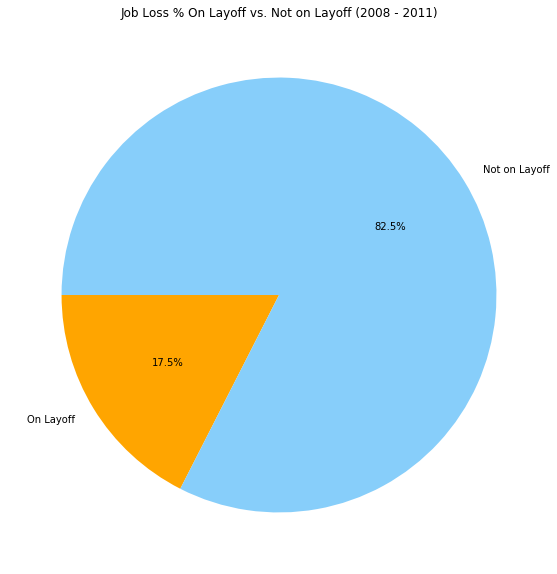

In [59]:
plt.figure(figsize=(10, 10))
plt.pie(layoffsplit, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=180)
plt.title("Job Loss % On Layoff vs. Not on Layoff (2008 - 2011)")


In [97]:
newworkforce = recession_layoffs[['Year', 'Month', 'Month #', 'Date', 'Overall Unemployment', 'Reentrants to Labor Force', 'New Entrants to Labor Force']]
newworkforce = newworkforce.reindex(index=newworkforce.index[::-1])

newworkforce = newworkforce.reset_index()
del newworkforce['index']

newworkforce.head(20)

,Year,Month,Month #,Date,Overall Unemployment,Reentrants to Labor Force,New Entrants to Labor Force
0,2008,January,1,2008-1,7685,2203,677
1,2008,February,2,2008-2,7497,2129,656
2,2008,March,3,2008-3,7822,2121,704
3,2008,April,4,2008-4,7637,2119,625
4,2008,May,5,2008-5,8395,2493,797
5,2008,June,6,2008-6,8575,2533,786
6,2008,July,7,2008-7,8937,2662,835
7,2008,August,8,2008-8,9438,2655,821
8,2008,September,9,2008-9,9494,2599,815
9,2008,October,10,2008-10,10074,2623,819


In [96]:
changein_unemployment = []
changein_reentrants = []
changein_newentrants = []
changein_dates = []

unemploy_change = 0
unemploy_changetwo = 0
reentry_change = 0
reentry_changetwo = 0
newentry_change = 0
newentry_changetwo = 0

for index, row in newworkforce.iterrows():
    unemploy_change = row['Overall Unemployment']
    reentry_change = row['Reentrants to Labor Force']
    newentry_change = row['New Entrants to Labor Force']
    changein_unemployment.append(unemploy_change - unemploy_changetwo)
    changein_reentrants.append(reentry_change - reentry_changetwo)
    changein_newentrants.append(newentry_change - newentry_changetwo)
    changein_dates.append(row['Date'])
    unemploy_changetwo = row['Overall Unemployment']
    reentry_changetwo = row['Reentrants to Labor Force']
    newentry_changetwo = row['New Entrants to Labor Force']


change_df= pd.DataFrame({'Date': changein_dates, 'Change in Total Unemployment': changein_unemployment, 
                         'Change in Reentrants': changein_reentrants, 'Change in New Entrants': changein_newentrants})

change_df = change_df.drop(0, axis=0)
change_df.head(10)

,Date,Change in Total Unemployment,Change in Reentrants,Change in New Entrants
1,2008-2,-188,-74,-21
2,2008-3,325,-8,48
3,2008-4,-185,-2,-79
4,2008-5,758,374,172
5,2008-6,180,40,-11
6,2008-7,362,129,49
7,2008-8,501,-7,-14
8,2008-9,56,-56,-6
9,2008-10,580,24,4
10,2008-11,464,70,-56


In [ ]:


(df - df.mean()) / (df.max() - df.min())

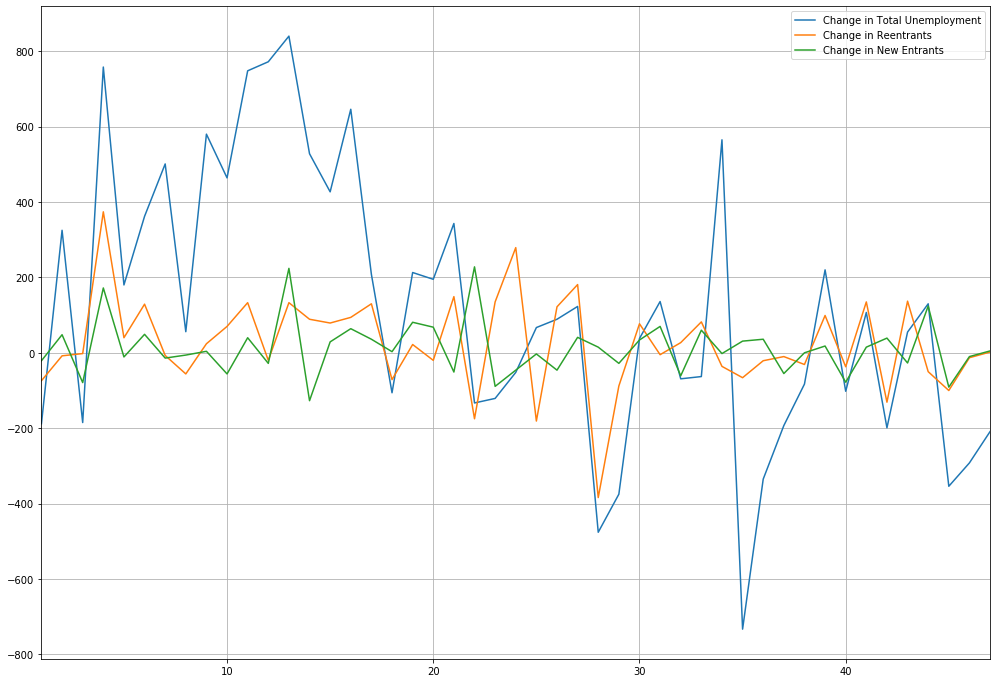

In [98]:
change_df.plot(figsize=(17, 12))
plt.grid()